## Text Mining - TP Stocks

### Librerias

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
data = pd.read_excel('C:/Users/ferna/Downloads/ypf PAGINAS v4.xlsx', sheet_name= 'UNIFICADO')

### Stopwords

In [3]:
nltk.download('stopwords')
stopwords_en = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Listado de stopwords propio
#stopwords_personales = []
#stopwords_all = stopwords_en.union(stopwords_personales)

In [5]:
word_counts = {}

for sentence in data[data['Category'].isin(['Positive'])]['Text'].to_list():
    words = sentence.split()
    
    for word in words:
        word = word.strip(".,!?()").lower()
        
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

In [6]:
word_counts_filtro = {word: count for word, count in word_counts.items() if word not in stopwords_en}

In [7]:
word_counts_orden = dict(sorted(word_counts_filtro.items(), key=lambda x: x[1], reverse=True))

In [8]:
word_counts_orden

{'ypf': 263,
 'sociedad': 107,
 'anonima': 102,
 'oil': 76,
 'zacks': 74,
 'published': 69,
 'equity': 59,
 'research': 59,
 'stocks': 52,
 'trading': 40,
 'argentina': 35,
 'buy': 35,
 'momentum': 30,
 'vaca': 28,
 'strong': 28,
 "argentina's": 27,
 'shale': 25,
 'could': 25,
 'muerta': 24,
 'argentina’s': 24,
 'know': 23,
 'day': 22,
 'investors': 22,
 'gas': 21,
 'production': 21,
 'session': 21,
 'gains': 21,
 'stock': 20,
 'closed': 20,
 'still': 19,
 'april': 19,
 '—': 18,
 'moving': 17,
 'energy': 16,
 'latest': 16,
 'move': 15,
 'best': 15,
 'bargain': 15,
 'prices': 15,
 'previous': 15,
 'market': 14,
 'marking': 14,
 'earnings': 14,
 'value': 14,
 'argentine': 13,
 'company': 13,
 'year': 13,
 'lithium': 13,
 'average': 12,
 'october': 12,
 'says': 11,
 'debt': 11,
 'fast-paced': 11,
 'made': 11,
 'screen': 11,
 'great': 11,
 'rank': 11,
 '5': 11,
 'industry': 11,
 'crude': 10,
 'june': 10,
 'looking': 10,
 'america': 10,
 'choice': 10,
 'gained': 10,
 'recently': 10,
 '#1': 

In [9]:
df = pd.DataFrame(list(word_counts_orden.items()), columns=['Word', 'Count'])

file_path = 'stopwords_pos_orden.xlsx'
df.to_excel(file_path, index=False)

### Train / Test

In [10]:
data_train = data[data['Train/Test'].isin(['Train'])]
data_test = data[data['Train/Test'].isin(['Test'])]

In [11]:
X_train = data_train['Text'].tolist()
y_train = data_train['Category'].tolist()

In [12]:
X_test = data_test['Text'].tolist()
y_test = data_test['Category'].tolist()

In [13]:
# Stemming / Lemma / stopwords
# clf: logistica / SVM / Random Forest //// BERT

text_clf = Pipeline([('vect' , CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf'  , MultinomialNB())
                    ])

### Entrenamiento

In [14]:
text_clf = text_clf.fit(X_train, y_train)

### Testeo

In [15]:
y_pred_nb = text_clf.predict(X_test)

In [16]:
y_pred_nb_proba = text_clf.predict_proba(X_test)

In [17]:
y_pred_nb

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive',
  

In [18]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_nb) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred_nb, average='weighted') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Accuracy: 61.90%

F1 Score: 53.57

Confusion Matrix:
 [[ 0  0 12]
 [ 0  8 19]
 [ 0  1 44]]


### SVC

In [19]:
from sklearn.svm import LinearSVC

In [20]:
text_clf_svc = Pipeline([('vect' , CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf'  , LinearSVC())
                    ])

In [21]:
text_clf_svc = text_clf_svc.fit(X_train, y_train)
y_pred_svc = text_clf_svc.predict(X_test)

In [22]:
from sklearn.calibration import CalibratedClassifierCV

text_clf_svc = Pipeline([('vect' , CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf'  , CalibratedClassifierCV(LinearSVC()))
                    ])

text_clf_svc = text_clf_svc.fit(X_train, y_train)

y_pred_svc_proba = text_clf_svc.predict_proba(X_test)

In [23]:
y_pred_svc_proba

array([[0.13536141, 0.18960845, 0.67503014],
       [0.16588042, 0.11700715, 0.71711243],
       [0.2312057 , 0.41049723, 0.35829707],
       [0.38145434, 0.1224581 , 0.49608756],
       [0.44090705, 0.09843615, 0.46065681],
       [0.36420725, 0.19791224, 0.43788051],
       [0.26937694, 0.14898724, 0.58163582],
       [0.278527  , 0.22238323, 0.49908977],
       [0.25761097, 0.24127255, 0.50111648],
       [0.15407326, 0.19556175, 0.650365  ],
       [0.2786607 , 0.27357831, 0.44776099],
       [0.12002321, 0.24390347, 0.63607332],
       [0.20281337, 0.27708321, 0.52010343],
       [0.26708601, 0.20189199, 0.531022  ],
       [0.20921301, 0.13785603, 0.65293096],
       [0.24940591, 0.28853892, 0.46205517],
       [0.4589241 , 0.31807191, 0.22300398],
       [0.10822239, 0.27718   , 0.61459761],
       [0.09643191, 0.249892  , 0.65367609],
       [0.07874533, 0.18485689, 0.73639778],
       [0.24697255, 0.1086578 , 0.64436965],
       [0.12243995, 0.46384991, 0.41371015],
       [0.

In [24]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svc) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred_svc, average='weighted') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Accuracy: 66.67%

F1 Score: 64.37

Confusion Matrix:
 [[ 2  1  9]
 [ 1 14 12]
 [ 4  1 40]]


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
text_clf_rf = Pipeline([('vect' , CountVectorizer()), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf'  , RandomForestClassifier())
                    ])

In [27]:
text_clf_rf = text_clf_rf.fit(X_train, y_train)
y_pred_rf = text_clf_rf.predict(X_test)

In [28]:
y_pred_rf_proba = text_clf_rf.predict_proba(X_test)

In [29]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred_rf, average='weighted') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 64.29%

F1 Score: 59.39

Confusion Matrix:
 [[ 3  0  9]
 [ 1  8 18]
 [ 1  1 43]]


### Stopwords

In [30]:
text_clf_nb_sw = Pipeline([('vect' , CountVectorizer(stop_words='english')), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf'  , MultinomialNB())
                    ])

In [31]:
text_clf_nb_sw = text_clf_nb_sw.fit(X_train, y_train)
y_pred_nb_sw = text_clf_nb_sw.predict(X_test)

### SVC

In [32]:
text_clf_svc_sw = Pipeline([('vect' , CountVectorizer(stop_words='english')), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf'  , LinearSVC())
                    ])

In [33]:
text_clf_svc_sw = text_clf_svc_sw.fit(X_train, y_train)
y_pred_svc_sw  = text_clf_svc_sw.predict(X_test)

In [34]:
text_clf_svc_sw = Pipeline([('vect' , CountVectorizer(stop_words='english')), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf'  , CalibratedClassifierCV(LinearSVC()))
                    ])

text_clf_svc_sw = text_clf_svc_sw.fit(X_train, y_train)
y_pred_svc_sw_proba  = text_clf_svc_sw.predict_proba(X_test)

#### Random Forest

In [35]:
text_clf_rf_sw = Pipeline([('vect' , CountVectorizer(stop_words='english')), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf'  , RandomForestClassifier())
                    ])

In [36]:
text_clf_rf_sw = text_clf_rf_sw.fit(X_train, y_train)
y_pred_rf_sw = text_clf_rf_sw.predict(X_test)

In [37]:
y_pred_rf_sw_proba = text_clf_rf_sw.predict_proba(X_test)

In [38]:
pd.DataFrame(y_pred_rf_sw_proba, columns=text_clf_rf_sw.classes_)

,Negative,Neutral,Positive
0,0.11,0.44,0.45
1,0.04,0.16,0.80
2,0.03,0.17,0.80
3,0.19,0.19,0.62
4,0.22,0.08,0.70
...,...,...,...
79,0.32,0.26,0.42
80,0.11,0.11,0.78
81,0.18,0.22,0.60
82,0.10,0.80,0.10


In [39]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_nb_sw) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred_nb_sw, average='weighted') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb_sw))

Accuracy: 61.90%

F1 Score: 53.57

Confusion Matrix:
 [[ 0  0 12]
 [ 0  8 19]
 [ 0  1 44]]


In [40]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svc_sw) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred_svc_sw, average='weighted') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc_sw))

Accuracy: 66.67%

F1 Score: 65.46

Confusion Matrix:
 [[ 5  0  7]
 [ 1 13 13]
 [ 4  3 38]]


In [41]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf_sw) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred_rf_sw, average='weighted') * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_sw))

Accuracy: 64.29%

F1 Score: 59.16

Confusion Matrix:
 [[ 2  0 10]
 [ 0  9 18]
 [ 1  1 43]]


### Output

In [42]:
models_pred = pd.DataFrame(
    {
        'X_test': X_test,
        'y_test': y_test,
        'MultinomialNB': y_pred_nb,
        'MultinomialNB_SW': y_pred_nb_sw,
        'SVC': y_pred_svc,
        'SVC_SW': y_pred_svc_sw,
        'RF':y_pred_rf,
        'RF_SW': y_pred_rf_sw
    }
)

In [43]:
models_pred

,X_test,y_test,MultinomialNB,MultinomialNB_SW,SVC,SVC_SW,RF,RF_SW
0,Vaca Muerta's Sweet Crude Attracts Global Ener...,Positive,Positive,Positive,Positive,Positive,Positive,Positive
1,Is YPF SA (YPF) a Smart Choice in Oil & Gas In...,Neutral,Positive,Positive,Positive,Positive,Positive,Positive
2,Mexico's Pemex the biggest liquidity worry amo...,Neutral,Positive,Positive,Neutral,Neutral,Positive,Positive
3,Argentina Fixes Oil at $56 a Barrel to Put Lid...,Negative,Positive,Positive,Positive,Negative,Positive,Positive
4,Argentina to freeze crude price at $56/bbl to ...,Negative,Positive,Positive,Positive,Negative,Positive,Positive
...,...,...,...,...,...,...,...,...
79,The 5 Latin American Countries With The Larges...,Positive,Positive,Positive,Negative,Negative,Positive,Positive
80,\nYPF Sociedad Anonima (YPF) Dips More Than B...,Negative,Positive,Positive,Positive,Positive,Positive,Positive
81,Could Argentina Replicate Brazil’s Offshore Oi...,Positive,Positive,Positive,Positive,Positive,Positive,Positive
82,\nIs Weatherford International (WFRD) Stock O...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral


In [44]:
models_pred.to_excel('ypf predicciones stopwords.xlsx', index=False)

## TODO
### 3. Lemma -> Transformar cada titulo a lista de palabras y lematizar (Fer)
### 4. Aplicar otros metodos de clasificacion:  BERT (NN) Standby
### 5. Metrica: AUC/ROC, F1 Score -> Considerar desbalanceo de clase / Accuracy medio truchi
### 6. Word2Vec (Fer)
### 7. Ensamble, ponderar las clasificaciones
### 8. OneVsOther -> Manipulacion de la resultante
### 9. Opcional -> Funcion para reducir codigo

In [45]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [46]:
nlp = spacy.load("en_core_web_sm")

In [47]:
v_lematizadas = []

for noticia in X_train:
    l_doc = nlp(noticia)
    v_lema = " ".join([token.lemma_.lower() for token in l_doc])
    v_lematizadas.append(v_lema)

In [48]:
v_lematizadas = []

for noticia in X_train:
    l_doc = nlp(noticia)
    v_lema = " ".join([token.lemma_.lower() for token in l_doc if token.text.lower() not in STOP_WORDS and not token.is_punct])
    v_lematizadas.append(v_lema)

In [49]:
for noticia in X_train:
    l_doc = nlp(noticia)
    for token in l_doc:
        print(token.text, " -- ", token.pos_, " -- ",token.lemma_)

 
  --  SPACE  --   

YPF  --  PROPN  --  YPF
Sociedad  --  PROPN  --  Sociedad
Anonima  --  PROPN  --  Anonima
(  --  PUNCT  --  (
YPF  --  PROPN  --  YPF
)  --  PUNCT  --  )
Gains  --  NOUN  --  gain
But  --  CCONJ  --  but
Lags  --  PROPN  --  Lags
Market  --  PROPN  --  Market
:  --  PUNCT  --  :
What  --  PRON  --  what
You  --  PRON  --  you
Should  --  AUX  --  should
Know  --  VERB  --  know

  --  SPACE  --  

by  --  ADP  --  by
Zacks  --  PROPN  --  Zacks
Equity  --  PROPN  --  Equity
Research  --  PROPN  --  Research
Published  --  VERB  --  publish
on  --  ADP  --  on
April  --  PROPN  --  April
27,2023  --  NUM  --  27,2023


  --  SPACE  --  


In  --  ADP  --  in
the  --  DET  --  the
latest  --  ADJ  --  late
trading  --  NOUN  --  trading
session  --  NOUN  --  session
,  --  PUNCT  --  ,
YPF  --  PROPN  --  YPF
Sociedad  --  PROPN  --  Sociedad
Anonima  --  PROPN  --  Anonima
(  --  PUNCT  --  (
YPF  --  PROPN  --  YPF
)  --  PUNCT  --  )
closed  --  VERB  --  close


In [50]:
v_lematizadas

[' \n ypf sociedad anonima ypf gain lags market know \n zacks equity research publish april 27,2023 \n\n late trading session ypf sociedad anonima ypf close $ 11.08 mark +0.54 previous day',
 'ypf sociedad anonima ypf gain lags market know',
 '15 cheap growth stock buy',
 ' \n ypf sociedad anonima ypf outpaces stock market gains know \n zacks equity research publish april 24,2023 \n\n ypf sociedad anonima ypf close recent trading day $ 11.43 move +1.15 previous trading session',
 ' \n investor undervalue ypf sociedad anonima ypf right \n zacks equity research publish april 24,2023 \n\n zacks focus prove zacks rank system emphasize earning estimate estimate revision find great stock pay attention late value growth momentum trend underscore strong pick',
 'focus argentina lithium pipeline promise white gold boom chile tighten control',
 'ypf spend $ 7b infrastructure lift oil export ceo say',
 ' \n zacks industry outlook highlights exxon mobil chevron bp ypf sociedad anonima \n zacks equ

## Ensamble

https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results

In [51]:
probas = [y_pred_nb_proba,
          y_pred_rf_proba,
          y_pred_rf_sw_proba,
          y_pred_svc_proba,
          y_pred_svc_sw_proba
]

In [52]:
v_probas = len(probas)
v_length = len(probas[0])

proba_ensemble = [[0] * 3 for _ in range(v_length)]

for proba in range(0,v_probas):
    for row in range(0,v_length):
        for category in range(0,3):
            proba_ensemble[row][category] += probas[proba][row][category]

for row in range(0,v_length):
    for category in range(0,3):
        proba_ensemble[row][category] = proba_ensemble[row][category]/4
        

In [53]:
data = {}
for i in range(3):
    column_name = chr(65 + i)
    data[column_name] = [inner_list[i] for inner_list in proba_ensemble]

df = pd.DataFrame(data)

print(df)

           A         B         C
0   0.146934  0.319356  0.783710
1   0.149534  0.162485  0.937981
2   0.165466  0.368606  0.715927
3   0.337514  0.183074  0.729412
4   0.377177  0.128538  0.744285
..       ...       ...       ...
79  0.362160  0.332211  0.555629
80  0.239496  0.070353  0.940151
81  0.256438  0.189994  0.803568
82  0.064243  0.968792  0.216965
83  0.113285  0.658485  0.478230

[84 rows x 3 columns]


In [54]:
prob_ensemble = pd.DataFrame(
    {
        'X_test': X_test,
        'y_test': y_test,
        'Negativo': df['A'].values.tolist(),
        'Neutro': df['B'].values.tolist(),
        'Positivo': df['C'].values.tolist()
    }
)

In [55]:
prob_ensemble


,X_test,y_test,Negativo,Neutro,Positivo
0,Vaca Muerta's Sweet Crude Attracts Global Ener...,Positive,0.146934,0.319356,0.783710
1,Is YPF SA (YPF) a Smart Choice in Oil & Gas In...,Neutral,0.149534,0.162485,0.937981
2,Mexico's Pemex the biggest liquidity worry amo...,Neutral,0.165466,0.368606,0.715927
3,Argentina Fixes Oil at $56 a Barrel to Put Lid...,Negative,0.337514,0.183074,0.729412
4,Argentina to freeze crude price at $56/bbl to ...,Negative,0.377177,0.128538,0.744285
...,...,...,...,...,...
79,The 5 Latin American Countries With The Larges...,Positive,0.362160,0.332211,0.555629
80,\nYPF Sociedad Anonima (YPF) Dips More Than B...,Negative,0.239496,0.070353,0.940151
81,Could Argentina Replicate Brazil’s Offshore Oi...,Positive,0.256438,0.189994,0.803568
82,\nIs Weatherford International (WFRD) Stock O...,Neutral,0.064243,0.968792,0.216965


In [56]:
prob_ensemble['Ensemble Label'] = prob_ensemble[['Negativo', 'Neutro', 'Positivo']].idxmax(axis=1)

In [57]:
prob_ensemble

,X_test,y_test,Negativo,Neutro,Positivo,Ensemble Label
0,Vaca Muerta's Sweet Crude Attracts Global Ener...,Positive,0.146934,0.319356,0.783710,Positivo
1,Is YPF SA (YPF) a Smart Choice in Oil & Gas In...,Neutral,0.149534,0.162485,0.937981,Positivo
2,Mexico's Pemex the biggest liquidity worry amo...,Neutral,0.165466,0.368606,0.715927,Positivo
3,Argentina Fixes Oil at $56 a Barrel to Put Lid...,Negative,0.337514,0.183074,0.729412,Positivo
4,Argentina to freeze crude price at $56/bbl to ...,Negative,0.377177,0.128538,0.744285,Positivo
...,...,...,...,...,...,...
79,The 5 Latin American Countries With The Larges...,Positive,0.362160,0.332211,0.555629,Positivo
80,\nYPF Sociedad Anonima (YPF) Dips More Than B...,Negative,0.239496,0.070353,0.940151,Positivo
81,Could Argentina Replicate Brazil’s Offshore Oi...,Positive,0.256438,0.189994,0.803568,Positivo
82,\nIs Weatherford International (WFRD) Stock O...,Neutral,0.064243,0.968792,0.216965,Neutro


In [58]:
X_test[80]

' \nYPF Sociedad Anonima (YPF) Dips More Than Broader Markets: What You Should Know\nby Zacks Equity Research Published on May 03,2023\n\nYPF Sociedad Anonima (YPF) closed the most recent trading day at $10.62, moving -1.76% from the previous trading session.'

## AUC/ROC

In [59]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

class_labels = ["Negative", "Neutral", "Positive"]

# Encode class labels to numerical values
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

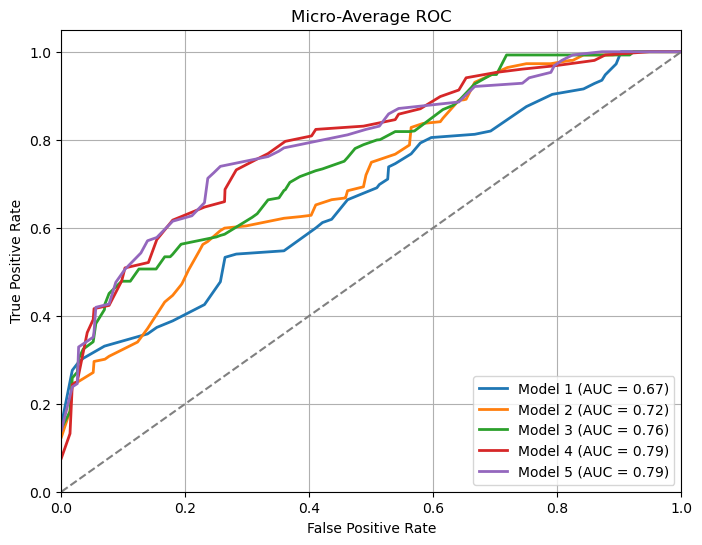

In [60]:
plt.figure(figsize=(8, 6))

for i, y_pred_probabilities in enumerate(probas):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    n_classes = len(class_labels) 
    for j in range(n_classes):
        y_true_class = (y_true_encoded == j).astype(int)
        fpr[j], tpr[j], _ = roc_curve(y_true_class, y_pred_probabilities[:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    all_fpr = np.unique(np.concatenate([fpr[j] for j in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for j in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[j], tpr[j])

    mean_tpr /= n_classes
    roc_auc_micro = auc(all_fpr, mean_tpr)

    plt.plot(all_fpr, mean_tpr, lw=2, label=f'Model {i+1} (AUC = {roc_auc_micro:.2f})')


plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Average ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
probas = [y_pred_nb_proba,
          y_pred_rf_proba,
          y_pred_rf_sw_proba,
          y_pred_svc_proba,
          y_pred_svc_sw_proba
]